# A brief introduction to ASE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ase import Atoms
import ase.build.molecule
from ase.build import graphene_nanoribbon
from ase.build import nanotube

from ase import io
from ase.visualize import view

### ASE

ASE ("Atomic Simulation Environment") is a powerful tool for working with atoms and molecules in Python. We will use it for performing simple calculations and looking at crystals, molecules etc.

If you want to read up on ASE there is plenty of information and tutorials at https://wiki.fysik.dtu.dk/ase/.

### Molecule structure, visualization


There are a few ways we can visualize, interact with and manipulate molecules and other chemical structures with ASE. Some common ways one can incorporate a molecular or structural object are:

- Making it with ASE using code. ASE has a large set of molecules and crystal whose structures you can just create using the tools from packages like ase.build. You just load a molecule you wish to work with and use it.

- Importing it from a file downloaded from a source on the internet. Common file types that contain information on chemical structures are xyz, cif, pdb, POSCAR, traj, mol, gen, etc. These are all compatible with ASE. 

- Making it with ASE manually. By running a jupyter notebook cell with the code "! ase gui", an ASE gui window pops up. In the drop-down menu you can select what you want to add (a molecule, a surface, or maybe something more exotic like a nanoparticle or a nanotube).

In this notebook we will use the first two of the listed options. 

In [3]:
# Lets first create an atom

F_atom = Atoms('F') # we create a fluorine atom

view(F_atom) # This opens up a new window where we can look at the atom.

When running the cell above, a new window pops up that displays the atom that you have just created. But since it is basically only a ball in floating in space, it doesn't look too interesting. Now let's try creating a molecule with the help of ASE.

As stated previously, there are many molecules whose structures exist in ASE's databases. We rely on ase.build's function "molecule" and we just state the chemical formula or the molecule's name and ASE creates it. 

Here are some examples. Comment out the line that creates the molecule that you want to see.

In [4]:
#molecule = ase.build.molecule('CH3COCH3', cell = [10,10,10]) # acetone

molecule = ase.build.molecule('isobutane', cell = [10,10,10])

#molecule = ase.build.molecule('C6H6', cell = [10,10,10]) # benzene

molecule.center()

view(molecule)

Upon creating a molecule, we put it into a cubic 10x10x10 Å cell just so that manual rotation of the molecule in the gui window would be more intuitive.

Sometimes we want to use more complex molecules in ASE. One way to load their structure into the notebook is to download the molecular structure from an online resource (there are plenty) and use ASE to read it. We need to make sure that it is a format that ASE can use, though. Here we load in a molecule from a file of "xyz" format. This is a very common and simple structure file format.

In [5]:
caffeine = io.read('caffeine.xyz')

view(caffeine)

You can use ASE to generate structures such as graphene nanosheets, nanoribbons and nanotubes. Here are a few examples.

In [6]:
# building a graphene sheets, ribbons and nanotubes
sheet = graphene_nanoribbon(
    n = 2,
    m= 2,
    sheet = True, # If true, make an infinite sheet instead of a ribbon. 
    vacuum = 2.5, # Amount of vacuum added to non-periodic directions, if present.
    )

ribbon = graphene_nanoribbon(
        n = 2, # The width of the nanoribbon.
        m = 8, # The length of the nanoribbon.
        type = 'armchair', # The orientation, either ‘zigzag’ or ‘armchair’.
        sheet = False, # If true, make an infinite sheet instead of a ribbon. 
        saturated = False, # If true, hydrogen atoms are placed along the edge.
        vacuum = 2.5, # Amount of vacuum added to non-periodic directions, if present.
)

tube = nanotube(3, 3, length=6, bond=1.4, symbol='C')

#view(sheet) # displays one repeating unit in the graphene structure you created
# in order to be able to actually look at the structure, we need to repeat it in the directions along the plane
#view(sheet*[5,1,5])  # this is a simple way to do it

#view(ribbon)
#view(ribbon*[2,1,2])

#view(tube)

In Lab 2 we will dive into ASE's functions that handle **crystal structures**, **surfaces** and **nanoparticles**. There we will also define atom objects and move them accross the crystal surfaces and calculating the adsorption energies

## Probing a molecule

We can also now probe the imported molecular structure of caffeine by using several ASE functions.

In [7]:
print(caffeine.get_chemical_formula())

atom_list = caffeine.get_chemical_symbols()
print(atom_list)

coords = caffeine.get_positions()

geometry_df = pd.DataFrame(index=atom_list, data = coords, columns = ['x (Å)', 'y (Å)', 'z (Å)'])

geometry_df.head(10) # since the list of atoms is very long, we display only the first 10 rows

C8H10N4O2
['O', 'O', 'N', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']


,x (Å),y (Å),z (Å)
O,15.610687,11.402728,6.123724
O,12.013587,8.390328,6.122824
N,14.172087,7.521428,6.123124
N,17.358887,8.975128,6.122824
N,13.792987,9.913628,6.123024
N,16.552587,6.896728,6.123324
C,15.998587,9.093128,6.122324
C,15.530387,7.807528,6.122724
C,15.171387,10.255928,6.122524
C,13.234587,8.584428,6.122724


In [8]:
print(caffeine.get_center_of_mass())  # Prints the coordinates of the molecule's center of mass

print(caffeine.get_cell_lengths_and_angles()) # Prints the cell lengths and angles

all_distances = caffeine.get_all_distances() # Outputs the matrix of distances between each two pairs of atoms
print(all_distances.shape) # Since this is huge, we can't print the whole thing

print(caffeine.get_distances(8,0))  # Prints the distance between atom 9 and atom 1
print(atom_list[0], atom_list[8])  # Prints which atoms are atoms 9 and O

[15.1075526   8.8621001   6.12317103]
[15. 15. 15. 60. 60. 60.]
(24, 24)
[1.22806196]
O C


We saw that it would be too much to display all the distances of each pair of atoms in a table. How about a histogram? Luckily, we know some Matplotlib that we can use for that.

Text(0, 0.5, 'Frequency')

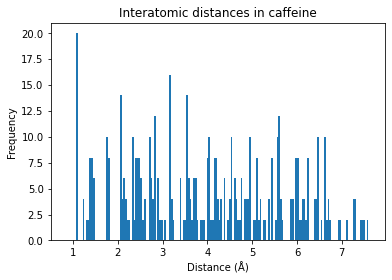

In [9]:
plt.hist(all_distances.flatten(), bins = 200)
# Here we "flattened" the 24x24 matrix of distances into a one-dimensional array with (24*24=) 576 elements
# We then plotted the histogram using the data from the flattened matrix
# We set the number of bins to 200 to get a nice resolution


plt.xlim(xmin = 0.5) # We exclude the 0 because those represent distances bwtween an atom and itself
plt.ylim(ymax = 21.)
plt.title('Interatomic distances in caffeine')
plt.xlabel('Distance (Å)')
plt.ylabel('Frequency')